In [33]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
from matplotlib import cm
#from matplotlib import norm
from matplotlib.colors import TwoSlopeNorm
warnings.filterwarnings('ignore')
import os

datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_Relaxation/Data/'
datadirAlt  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_MonomerMeasurements/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_Relaxation/Plots/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)

# Increase the recursion limit
sys.setrecursionlimit(6000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current recursion limit: 6000


In [34]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        #print(i)
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x,diff[x]

In [35]:
cmap0 = plt.cm.get_cmap('YlOrBr') #YlOrBr
clrs1= ['#edf8b1','#7fcdbb','#2c7fb8']
clrs2=['#f7fcb9','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['#e7e1ef','#c994c7','#dd1c77']

clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84','dimgrey']
#clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494']
clrs1= ['grey','#7fcdbb','#2c7fb8']
clrs2=['grey','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['grey','#c994c7','#dd1c77']
clrs_div = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
clrrrs=[clrs1,clrs3,clrs2]

#'YlOrBr'
ClrsRici = ["#96a2c1ff","#999ebeff","#a697baff","#b795afff","#c996a8ff","#d398a5ff"]
ClrsRici = ["#7883acff","#3e387bff","#73457aff","#a66181ff","#b25268ff","#d49995ff"]
ClrsRiciChosen = ClrsRici #["#7883acff","#73457aff","#b25268ff","#d49995ff"]
ClrsOrange = ["#fed98e","#fe9929","#d95f0e","#993404"]

[22.73729083174024, 33.89277957831213, 44.54559159156487, 62.49698463669615, 100.25982355444269, 264.83128160509943]


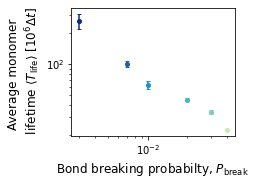

In [36]:
fig2,ax2 = plt.subplots(1,figsize = (3.5,2.6))

f=3
MP = "0.12 0.1 0.06 0.03 0.02 0.01".split() # ORIGINAL RANGE  0.12 0.1 0.06 0.03 0.02 0.01
BP = "0.04 0.03 0.02 0.01 0.007 0.003".split() # ORIGINAL RANGE 0.04 0.03 0.02 0.01 0.007 0.003
seeds= "1 2 3".split()
BPsV = [0.04,0.03,0.02,0.01,0.007,0.003]
AvTmonlife = []
StdTmonlife = []
AvLargestComps = []
for f in range(len(MP)):
    IndividualT_MonRelase = []
    LargestCompsEnd = []
    Tmonlife = []
    for s in range(len(seeds)):
        RateMons = []
        RateMonsRel = []
        RateMonsInc = []
        #Time NumMons RateMons LargestComp
        filename = 'monomerdata_BP'+BP[f]+'_S'+seeds[s]+'.dat'
        MonData = pandas.read_csv(datadirAlt+filename, header = 'infer',sep=' ')
        Time_ = MonData.Time
        NumMons_ = MonData.NumMons
        RateMons_ = MonData.RateMons
        LargestComp_ = MonData.LargestComp
        Time,NumMons,RateMons,LargestComp =Time_.values,NumMons_.values,RateMons_.values,LargestComp_.values
        if len(Time)>0:
            if Time[-1] >1.4e6:
                #for tt in range(len(Time)-1):
                #    RateMons.append((NumMons[tt+1]-NumMons[tt])/(Time[tt+1]-Time[tt]))
                AvNumMons = np.mean(NumMons[int(len(RateMons)/2):])
                NumInNetwork = 6330-AvNumMons
                AverageT_MonRelease = np.divide(1,np.mean(np.abs(RateMons[int(len(RateMons)/2):])))
                IndividualT_MonRelase.append(np.divide(AverageT_MonRelease * NumInNetwork,10**6))

                N=6
                rollingRatAv = np.convolve(np.abs(np.ravel(RateMons)), np.ones(N)/N, mode='valid')
                timeRol = Time[int(N/2)+1:-int(N/2-1)]
                idx = (np.abs(Time - 1509600)).argmin()
                LargestCompsEnd.append(LargestComp[idx])
                Tmonlife.append(IndividualT_MonRelase)
    AvTmonlife.append(np.mean(Tmonlife))
    StdTmonlife.append(np.std(Tmonlife))
    AvLargestComps.append(np.mean(LargestCompsEnd))
    ax2.errorbar(BPsV[f],np.mean(IndividualT_MonRelase),yerr = np.std(IndividualT_MonRelase),capsize = 2,color = clrs_5[f],marker = 'o',markersize = 4) ##Would this by x2??
    #ax2.plot(BPsV[f],np.divide(np.mean(IndividualT_MonRelase),10**6),color = clrs_5[f],marker = 'o',markersize = 10) ##Would this by x2??
    #print(MP[f],np.mean(IndividualT_MonRelase),np.std(IndividualT_MonRelase))
#ax[2].set_ylabel("Free monomer lifetime",fontsize = 12)
ax2.set_ylabel("Average monomer \n lifetime"+r" $ \langle T_{\mathrm{life}}\rangle$ [$10^6\Delta t$]",fontsize = 12)
ax2.set_xlabel("Bond breaking probabilty, $P_{\mathrm{break}}$",fontsize = 12)
#ax2.set_yscale('log')
#ax2.set_yticks([0,100,200,300],['0','100','200','300'])
#ax2.set_ylim([0,350])
print(AvTmonlife)
fig2.tight_layout()

ax2.set_yscale('log')
ax2.set_xscale('log')
#ax.set_ylim([70,100])
plotname = "EquilibriumMaster.pdf"
#fig.savefig(plotsdir+plotname)

plotname2 = "MonomerExchangeMaster.pdf"
#fig2.savefig(plotsdir+plotname2)
##plotname = "Equilibration_quants.pdf"


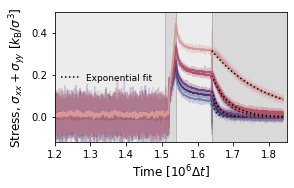

In [37]:
fig,ax = plt.subplots(1,figsize = (4.3,2.7))


xstretches = "51 76".split()
MPs = "0.1 0.03 0.01".split()
BPs = "0.03 0.01 0.003".split()
seeds1 = "1 2 3".split()
seeds2  = "1 3".split()


lenT0 = 75922
lenT1 = 3272
MPs = "0.12 0.1 0.06 0.03 0.02 0.01".split()
BPs = "0.04 0.03 0.02 0.01 0.007 0.003".split()
seeds1 = "1 2 3".split()
seeds2  = "1 3".split()


timeFactor = 10**6
#t_Eq = (1509600*0.5)/timeFactor
#t_MT = (1509600*0.5)/timeFactor +t_Eq
#endOfEq = 1509600
#t_strain = ((20000+10000)/timeFactor)+t_MT
#t_InitRel = 10000*10/timeFactor+t_strain
#t_addmons = 1000/timeFactor +t_InitRel
#t_FulLRel = 1000000/timeFactor+t_InitRel

times = [0,t_Eq,t_MT,t_strain,t_InitRel,t_FulLRel]
#strains=[0,0,0,100,100,100]
UP,LW=-0.15,0.65
#ax.plot(times,strains,linestyle = '-',color = 'black')
ax.fill_between([0,t_Eq],[LW,LW],[UP,UP],alpha = 0.15,color = 'black')
ax.fill_between([t_MT,t_strain],[LW,LW],[UP,UP],alpha = 0.15,color = 'black')
ax.fill_between([t_Eq,t_MT],[LW,LW],[UP,UP],alpha = 0.15,color = 'grey')
ax.fill_between([t_strain,t_InitRel],[LW,LW],[UP,UP],alpha = 0.15,color = 'grey')
ax.fill_between([t_InitRel,t_FulLRel],[LW,LW],[UP,UP],alpha = 0.15,color = 'black')
xstretches = "51 76".split()
x=1
#ax.set_ylabel("% applied x-y strain",fontsize =12)
ax.set_xlabel('Time [$10^{6}\Delta t$]',fontsize = 12)
#ax.set_xlim([-0.1,t_FulLRel+0.1])
#TmonAv = np.divide([64,100,330],10)
#22.8555011732714, 33.89276760171024, 44.545528358176234, 62.49702830973359, 100.25979092931783, 264.8313782857122
#TmonAv = [2,3,4,6,10,26]
#TmonAv = [3,6,26]
#Tmonstd = np.divide([3.571501191030219,5.480583457304206,13.19089058082929],10)
mrks = [":","-","--"]
alphs = [0.5,0.5,0.5]
Avtaus = []
Stdtaus = []

x=1
Vol1 = 51*51*12
Vol2 = (51+int(xstretches[x]))*(51+int(xstretches[x]))*12-Vol1
for p in range(len(MPs)):
    filename = 'stressdata_BP'+BP[p]+'.dat'
    
    StressData = pandas.read_csv(datadir+filename, header = 'infer',sep=' ')
    Time_ = StressData.Time
    stressTotAv_ = StressData.stressAv
    stressTotAv,Time = stressTotAv_.values,Time_.values
    rollingAvRelax = np.convolve(stressTotAv[lenT0+lenT1:], np.ones(N)/N, mode='valid')
    timePostStretch = np.add(Time[lenT0+lenT1:],-Time[lenT0+lenT1])[int(N/2):-int(N/2-1)]
    stressPostStretch = rollingAvRelax
    
    phi_inf = 0
    phi0 = stressPostStretch[10]
    phiTau = phi0/np.exp(1)
    tau = timePostStretch[intersection(stressPostStretch,phiTau)[0]]
    phiTheory = []
    for tt in range(len(timePostStretch)):
        t = timePostStretch[tt]
        phiTheory.append(phiform(phi0,phi_inf,tau,t))
    
    ax.plot(np.divide(Time,timeFactor),stressTotAv,color = ClrsRiciChosen[p],alpha =0.3)
    #print(len(stressTotAv))
    #ax.plot(np.divide(Time[lenT0+lenT1:],timeFactor),stressTotAv[lenT0+lenT1:],color = 'black',alpha =0.3)
    N=50
    rollingAv = np.convolve(stressTotAv, np.ones(N)/N, mode='valid')
        #rollingAvY = np.convolve(stressY, np.ones(N)/N, mode='valid')
    timeAv = Time[int(N/2):-int(N/2-1)]
            
    ax.plot(np.divide(timeAv,timeFactor),rollingAv,color = ClrsRiciChosen[p],linestyle = '-')
    if p==0:
        ax.plot(np.divide(np.add(timePostStretch,Time[lenT0+lenT1]),timeFactor),phiTheory,linestyle = ':',color = 'black',label = 'Exponential fit')
    else:
        ax.plot(np.divide(np.add(timePostStretch,Time[lenT0+lenT1]),timeFactor),phiTheory,linestyle = ':',color = 'black')


ax.set_ylabel(r'Stress, $\sigma_{xx}+\sigma_{yy}~[k_{\mathrm{B}}/\sigma^{3}]$',fontsize = 12)
ax.set_xlim([1.2,1.85])
ax.set_ylim([-0.12,0.5])
ax.legend(frameon=False,loc = [0.01,0.43],fontsize = 9)
fig.tight_layout()
plotname = "Stress_relaxation.pdf"
#fig.savefig(plotsdir + plotname)

In [38]:
#OtherData

Avtaus =[14234.0, 17030.666666666668, 21329.333333333332, 38244.666666666664, 48664.666666666664, 150533.33333333334] 
Stdtaus= [2172.0, 2103.1102892832055, 1442.1413091495422, 4186.233098569113, 5931.628519124313, 10291.6670931174]
#TmonAv = [3,6,26]
#Tmonstd = np.divide([3.571501191030219,5.480583457304206,13.19089058082929],10)

## Plotting master T Vs T plot

LC 0.9195892575039495
0.7319641916798318
LC 0.9404949973670352
0.8016499912234509
LC 0.9369141653501843
0.7897138845006146
LC 0.9429173249078463
0.8097244163594879
LC 0.9592417061611375
0.8641390205371251
LC 0.9765139547130068
0.9217131823766896


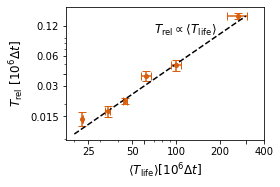

posx and posy should be finite values


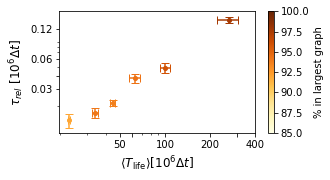

In [39]:
fig,ax = plt.subplots(1,figsize = (4.,2.7))

#y=mc+c
#0.15*20000 [0.01,0.15]

ax.errorbar(AvTmonlife,np.divide(Avtaus,10**6),xerr = StdTmonlife,yerr = np.divide(Stdtaus,10**6),color = ClrsOrange[2],linestyle = '',marker = 'o',markersize = 4,capsize = 4)
ax.plot([20,300],[0.0005*20,0.0005*300],linestyle = '--',color = 'black') #ClrsOrange[3])
ax.set_xlabel(r'$\langle T_{\mathrm{life}}\rangle [10^6\Delta t]$',fontsize = 12)
ax.set_ylabel(r"$T_{\mathrm{rel}}$ [$10^6\Delta t$]",fontsize = 12)

text = r'$\tau_{rel} = 5\cdot 10^{-4}\langle T_{\mathrm{life}}\rangle$'
text = r'$T_{\mathrm{rel}} \propto \langle T_{\mathrm{life}}\rangle$'
ax.text(70,0.1,text,color = 'black',fontsize = 12)
#---- log-log axis---#
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([25,50,60,100,200,300,400],['25','50','','100','200','','400'])
ax.set_yticks([0.015,0.03,0.04,0.06,0.12],['0.015','0.03','','0.06','0.12'])
#---- normal axis ----#
#ax.set_xticks([100,200,300,400],['100','200','300','400'])
#ax.set_yticks([0.05,0.1,0.15],['0.05','0.1','0.15'])

fig.tight_layout()
plotname = 'Master_tau_vs_Tlife.pdf'
fig.savefig(plotsdir+plotname)

LargestComp = np.divide(AvLargestComps,6330)
#print(LargestComp-)
norm = TwoSlopeNorm(vmin=85, vcenter=92.5,vmax=100)
fig2,ax2 = plt.subplots(1,figsize = (4.5,2.6))
for i in range(len(Avtaus)):
    ax2.errorbar(AvTmonlife[i],np.divide(Avtaus[i],10**6),xerr = StdTmonlife[i],yerr = np.divide(Stdtaus[i],10**6),color =cmap0((LargestComp[i]-0.85)/(0.15)), linestyle = '',marker = 'o',markersize = 4,capsize = 4)
    print("LC",LargestComp[i])
    print((LargestComp[i]-0.7)/(0.3))
ax2.set_xlabel(r'$\langle T_{\mathrm{life}}\rangle [10^6\Delta t]$',fontsize = 12)
ax2.set_ylabel(r"$\tau_{rel}$ [$10^6\Delta t$]",fontsize = 12)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks([50,60,100,200,300,400],['50','','100','200','','400'])
ax2.set_yticks([0.03,0.04,0.06,0.12],['0.03','','0.06','0.12'])
fig2.show()
fig2.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap0),ax=ax2, label = '% in largest graph')
fig2.tight_layout()

#fig2.savefig(plotsdir+plotname2)